In [35]:
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt
%matplotlib inline 
#permite que le coloquemos ; en vez de show()
import seaborn as sns 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [16]:
df=pd.read_csv("Ventas2.csv")
df.head(3)

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [18]:
#convertir la columna fecha a datetime 
df["Fecha"]=pd.to_datetime(df["Fecha"])
df.head(2)

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012


In [19]:
escala = MinMaxScaler(feature_range=(0,1))
#elinamos las columnas no deseadas 
col_para_escalar=df.drop(["Ventas", "Fecha"],axis=1).columns
#ajustamosa las columnas restantes y transformamos los datos 
normado = escala.fit_transform(df[col_para_escalar])
#creamos un dataframe normalizado y columnas correctas 
df_normado = pd.DataFrame(data=normado, columns=col_para_escalar)
df_normado["Ventas"]=df["Ventas"]
df_normado["Fecha"]=df["Fecha"]
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [21]:
#identificamos las var idependiente y dependiente 
X = df_normado.drop(["Ventas", "Fecha"], axis=1)
y=df["Ventas"]

In [22]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X,y,train_size=0.8,
                                                           random_state=42)

In [23]:
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


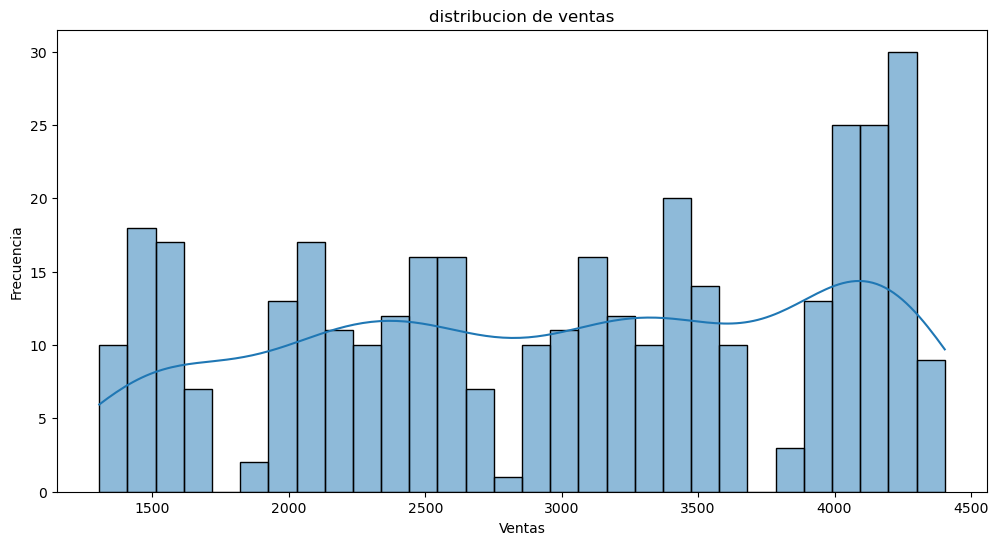

In [26]:
#visualizacion de la distribucion de ventas
plt.figure(figsize=(12,6))
sns.histplot(df["Ventas"], bins=30,kde=True)
plt.title("distribucion de ventas")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia");

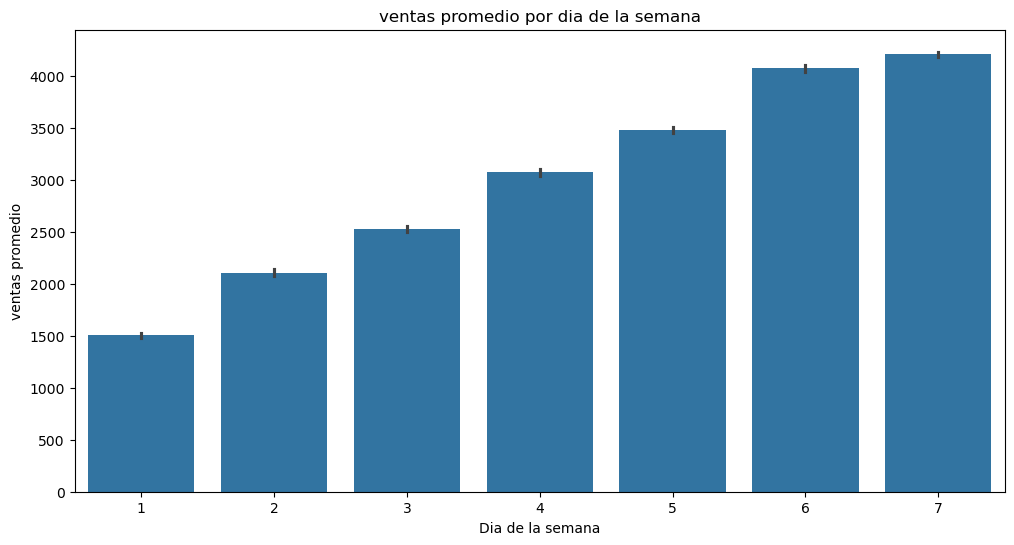

In [29]:
#relacion entre las ventas y dia de la semana promedio
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='DíaDeLaSemana', y='Ventas')
plt.title("ventas promedio por dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("ventas promedio");

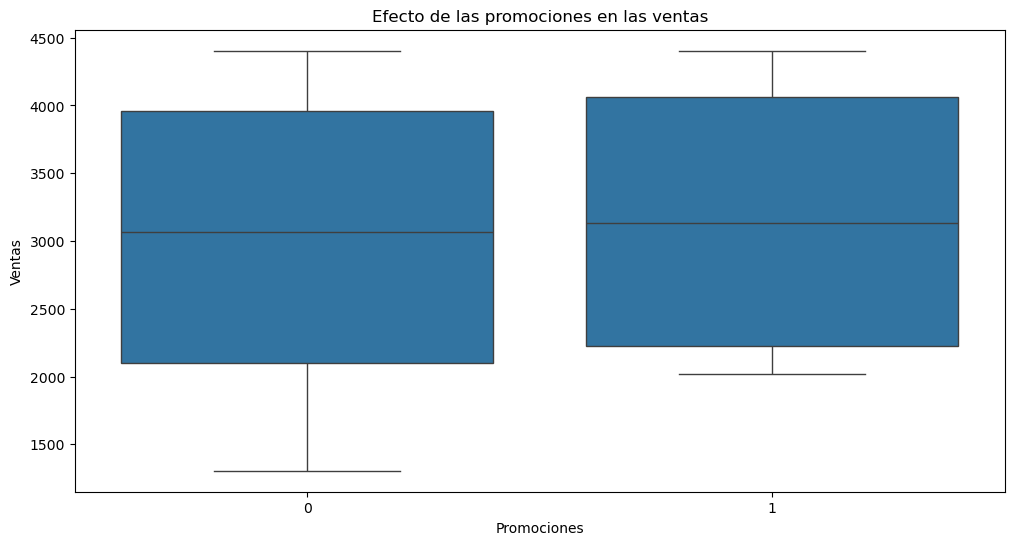

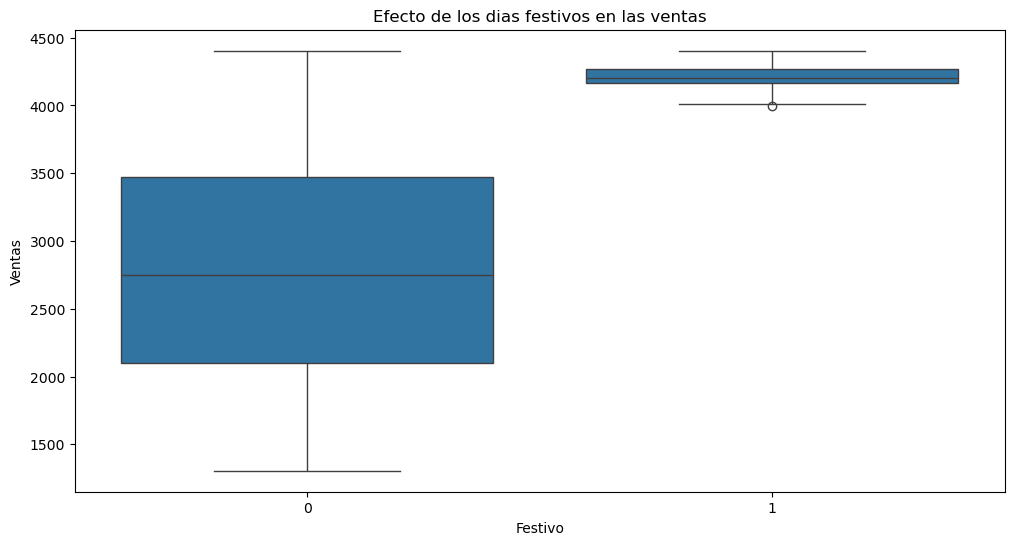

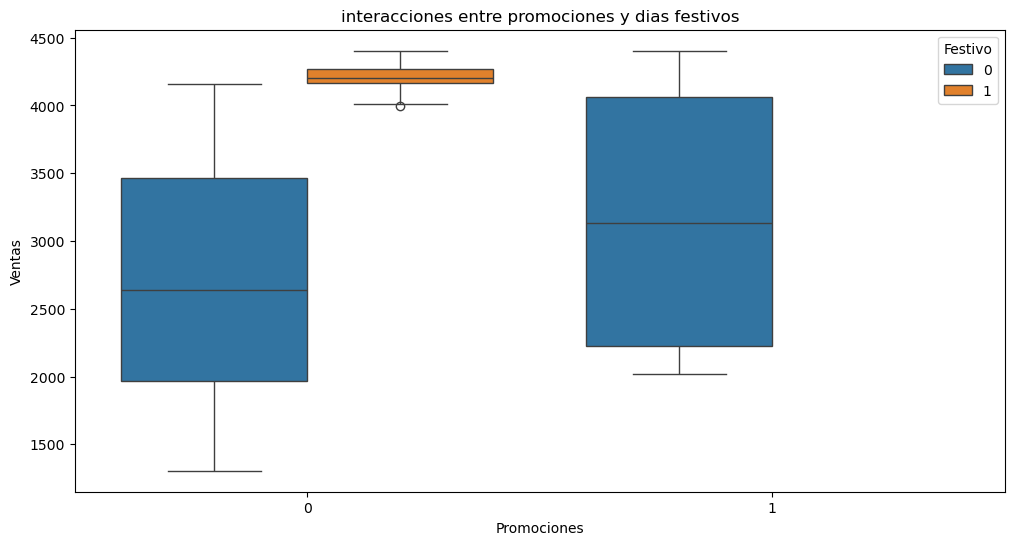

In [31]:
#boxplot para comparar las ventas con y sin promociones 
plt.figure(figsize=(12,6))
sns.boxplot(x='Promociones',y='Ventas',data=df)
plt.title("Efecto de las promociones en las ventas")
#boxplot para comparar las ventas con dias de la semana normales
plt.figure(figsize=(12,6))
sns.boxplot(x='Festivo', y="Ventas", data=df)
plt.title("Efecto de los dias festivos en las ventas")
#interraciones y los dias festivos en las ventas 
plt.figure(figsize=(12,6))
sns.boxplot(x="Promociones", y="Ventas", hue="Festivo", data=df)
plt.title("interacciones entre promociones y dias festivos");

In [37]:
#seleccion del modelo
modelos = [
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque",RandomForestRegressor(random_state=42))
]

In [38]:
#entrenar modelos y mostrar puntajes
for nombre , modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje=modelo.score(X_prueba, y_prueba)
    print(f"{nombre}:{puntaje}")

modelo lineal:0.9924245101323562
modelo arbol:0.9923508015371342
modelo bosque:0.9923097376813321


In [39]:
#entreniamento y evaluacion 
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_entrena, y_entrena)
predicciones_lineal = modelo_lineal.predict(X_prueba)

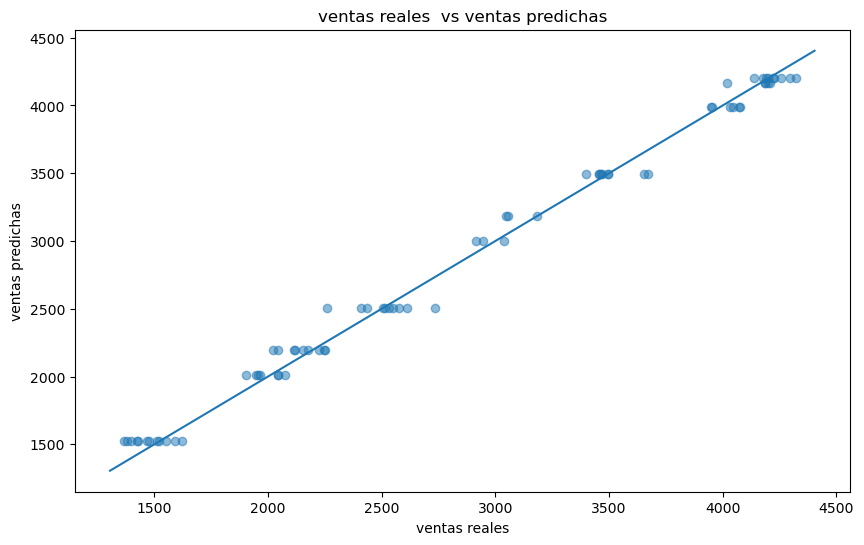

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(y_prueba,predicciones_lineal,alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()])
plt.xlabel("ventas reales")
plt.ylabel("ventas predichas")
plt.title("ventas reales  vs ventas predichas");

In [41]:
df_test = pd.DataFrame({"real":y_prueba, "predicha":predicciones_lineal})
df_test =df_test.sort_index()

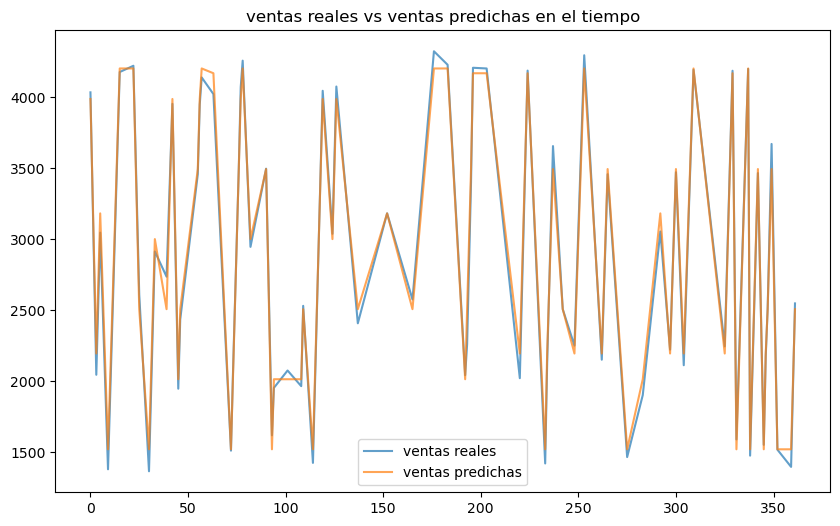

In [45]:
plt.figure(figsize=(10,6))
plt.plot(df_test["real"],label="ventas reales",alpha=0.7)
plt.plot(df_test["predicha"],label="ventas predichas",alpha=0.7)
plt.legend()
plt.title("ventas reales vs ventas predichas en el tiempo");